In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)



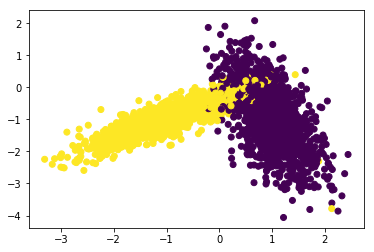

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
from sklearn.metrics import accuracy_score

def RandomSearchCV(x_train,y_train,clf,param_range,folds):
    low=param_range[0]
    high=param_range[1]
    params=sorted(random.sample(range(low,high),10)) #randomly generated param values
    trainscores=[]
    cvscores=[]    
    for k in tqdm(params):  #for every k value
        trainscores_folds=[]
        cvscores_folds=[]
        n=len(x_train)   #length of train datset is 7500
        part=int(n/folds) #number of parts the train dataset should divide into
        for j in range(0,n,part):             #in 1st iterate cv_indices will be (0 to 2499) and remaining are train_indices
            cv_indices=list(range(j,j+part))  #simillary in 2nd iterate cv_indiecs(2500 to 4999) and 3rd iterate (5000 to 7499)
            train_indices=list((set(list(range(1,n))))-(set(cv_indices)))

            X_train=x_train[train_indices]
            Y_train=y_train[train_indices]
            X_cv=x_train[cv_indices]
            Y_cv=y_train[cv_indices]

            clf.n_neighbors=k
            clf.fit(X_train,Y_train)  #fitting model KNeighborsClassifier

            Y_predict=clf.predict(X_train) #predicting class label for train dataset
            trainscores_folds.append(accuracy_score(Y_train,Y_predict))#accuracy for trainscores

            Y_predict=clf.predict(X_cv)  #predicting class label for cv dataset
            cvscores_folds.append(accuracy_score(Y_cv,Y_predict))  #accuracy for cvscores
            
        trainscores.append(np.mean(np.array(trainscores_folds)))   #accuracy of train and cv scores for
        cvscores.append(np.mean(np.array(cvscores_folds)))         #different values of k
    return trainscores,cvscores,params

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.63it/s]


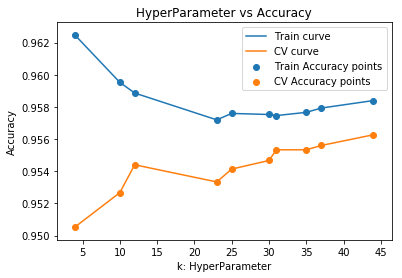

k values [4, 10, 12, 23, 25, 30, 31, 35, 37, 44]


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random

neigh = KNeighborsClassifier()
param_range=(1,50)
folds=3

trainscores,cvscores,params=RandomSearchCV(X_train,y_train,neigh,param_range,folds)


plt.plot(params,trainscores,label="Train curve")
plt.plot(params,cvscores,label="CV curve")
plt.scatter(params,trainscores,label="Train Accuracy points")
plt.scatter(params,cvscores,label="CV Accuracy points")

plt.legend()
plt.xlabel("k: HyperParameter")
plt.ylabel("Accuracy")
plt.title("HyperParameter vs Accuracy")
plt.show()


print("k values {}".format(params))

In [5]:
def plot_decision_boundary(X1,X2,y,clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

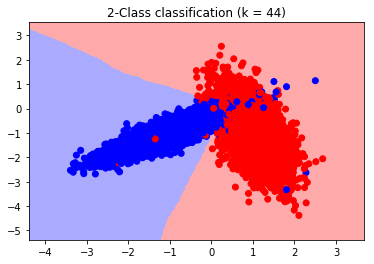

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors=44)
neigh.fit(X_train,y_train)
plot_decision_boundary(X_train[:, 0],X_train[:, 1],y_train,neigh)